170498071/170498071 [==============================] - 4s 0us/step


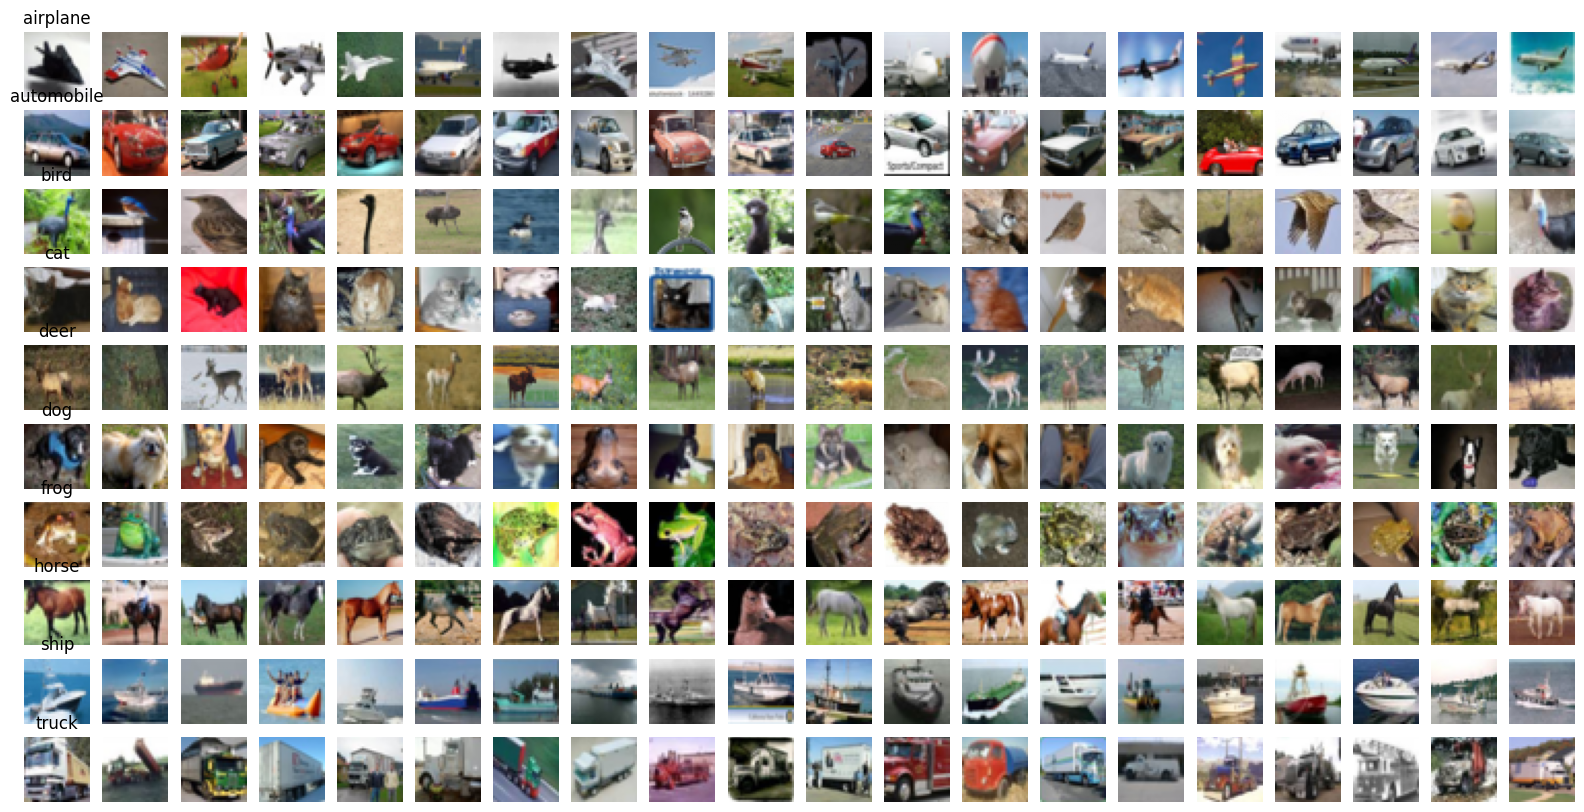

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 10))

for i in range(len(class_names)):
  indices = np.where(train_labels == i)[0][:20]

  for j, index in enumerate(indices):
    plt.subplot(10, 20, i * 20 + j + 1)
    plt.imshow(train_images[index])
    plt.axis('off')
    if j == 0:
      plt.title(class_names[i])

plt.show()

Creating a CNN model Con2D and max Pooling layers alone

In [4]:
# CNN Model with activation function as relu
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model_history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5041 - accuracy: 0.4550 - val_loss: 1.2562 - val_accuracy: 0.5508
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1313 - accuracy: 0.5992 - val_loss: 1.0255 - val_accuracy: 0.6396
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9797 - accuracy: 0.6556 - val_loss: 0.9628 - val_accuracy: 0.6624
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8869 - accuracy: 0.6886 - val_loss: 0.9322 - val_accuracy: 0.6758
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8136 - accuracy: 0.7133 - val_loss: 0.9860 - val_accuracy: 0.6636
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7554 - accuracy: 0.7356 - val_loss: 0.8957 - val_accuracy: 0.6948
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7094 - accuracy: 0.7512 - val_loss: 0.8826 -

In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"test loss: {test_loss}, test accuracy: {test_acc}")

313/313 - 4s - loss: 0.8890 - accuracy: 0.7059 - 4s/epoch - 11ms/step
test loss: 0.8890019655227661, test accuracy: 0.7059000134468079


Adding Batch Normalization in the model

In [7]:
# Adding Batch Normalisation to the CNN model to improve training speed and stability
model_batch_normalisation = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Flatten(),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(10)
])

In [8]:
model_batch_normalisation.compile(optimizer='adam',
                                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                  metrics=['accuracy'])
model_batch_normalisation_history = model_batch_normalisation.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 106s 66ms/step - loss: 1.2477 - accuracy: 0.5575 - val_loss: 1.5689 - val_accuracy: 0.4768
Epoch 2/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.9171 - accuracy: 0.6758 - val_loss: 1.2800 - val_accuracy: 0.5716
Epoch 3/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.7896 - accuracy: 0.7243 - val_loss: 1.0338 - val_accuracy: 0.6457
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.6963 - accuracy: 0.7553 - val_loss: 0.9219 - val_accuracy: 0.6850
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.6316 - accuracy: 0.7790 - val_loss: 1.0619 - val_accuracy: 0.6449
Epoch 6/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.5686 - accuracy: 0.8014 - val_loss: 0.8077 - val_accuracy: 0.7254
Epoch 7/10
1563/1563 [==============================] - 98s 62ms/step - loss: 0.5181 - accuracy: 0.8189 - val_loss: 1.2952 

In [9]:
test_loss, test_acc = model_batch_normalisation.evaluate(test_images,  test_labels, verbose=2)
print(f"test loss: {test_loss}, test accuracy: {test_acc}")

313/313 - 6s - loss: 0.8990 - accuracy: 0.7217 - 6s/epoch - 18ms/step
test loss: 0.8989502191543579, test accuracy: 0.7217000126838684


Adding Dropdout layers in the CNN model

In [10]:
# adding dropout to the CNN model
model_dropout = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after MaxPooling

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Another Dropout layer

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer before the final Dense layer

    layers.Dense(10)
])

# Compile the model
model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_dropout_history = model_dropout.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.7714 - accuracy: 0.3443 - val_loss: 1.4365 - val_accuracy: 0.4857
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4368 - accuracy: 0.4861 - val_loss: 1.2398 - val_accuracy: 0.5549
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.3179 - accuracy: 0.5339 - val_loss: 1.1798 - val_accuracy: 0.5868
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.2352 - accuracy: 0.5689 - val_loss: 1.0735 - val_accuracy: 0.6254
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1641 - accuracy: 0.5918 - val_loss: 0.9897 - val_accuracy: 0.6514
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1173 - accuracy: 0.6104 - val_loss: 0.9692 - val_accuracy: 0.6613
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0770 - accuracy: 0.6262 - val_loss: 0.9541 -

In [11]:
test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels, verbose=2)
print(f"test loss: {test_loss}, test accuracy: {test_acc}")

313/313 - 3s - loss: 0.9232 - accuracy: 0.6825 - 3s/epoch - 11ms/step
test loss: 0.9231852293014526, test accuracy: 0.6825000047683716


CHECKING IF THE MODELS ARE WELL FITTED< OVER FITTED OR UNDER FITTED

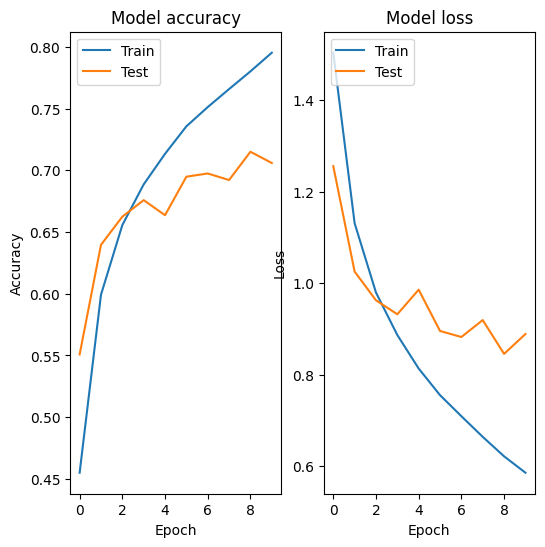

The model is likely overfitting.
Model History
 None


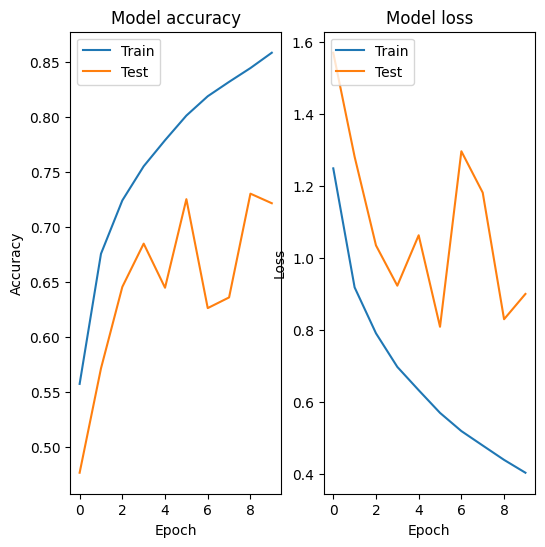

The model is likely overfitting.
Model History with Batch Normalisation
 None


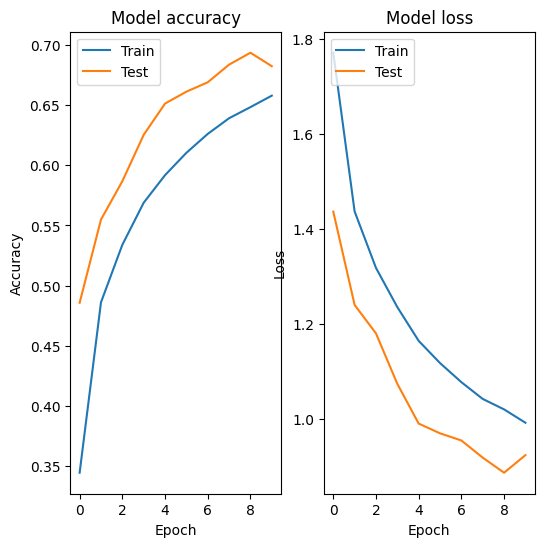

The model is likely underfitting.
Model history with dropout history
 None


In [13]:
def check_model_fit(history):
  # Plot training & validation accuracy values
  plt.figure(figsize=(6, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test'], loc='upper left')

  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'], loc='upper left')

  plt.show()

  # Check for overfitting or underfitting
  if min(history.history['val_loss']) > min(history.history['loss']):
      print("The model is likely overfitting.")
  elif max(history.history['val_accuracy']) < 0.7:  # Assuming 0.7 is the acceptable accuracy threshold
      print("The model is likely underfitting.")
  else:
      print("The model is well-fitted.")

print('Model History\n', check_model_fit(model_history))
print('Model History with Batch Normalisation\n', check_model_fit(model_batch_normalisation_history))
print('Model history with dropout history\n', check_model_fit(model_dropout_history))


Adding another convolution and max pooling layer in the model

In [16]:
# Adding a Convolution and pooling layer pair in the model_dropout to improve accuracy
# Choosing this model as it is underfitting
model_dropout_add_layers = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # First Dropout layer after MaxPooling

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Second Dropout layer after the second MaxPooling

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.25),  # Additional Dropout layer after a Conv2D layer

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Another Dropout layer before the final Dense layer

    layers.Dense(10)
])


# Compile the model
model_dropout_add_layers.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_dropout_history = model_dropout_add_layers.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 86s 54ms/step - loss: 1.7455 - accuracy: 0.3556 - val_loss: 1.3732 - val_accuracy: 0.5025
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4180 - accuracy: 0.4922 - val_loss: 1.1918 - val_accuracy: 0.5760
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3041 - accuracy: 0.5409 - val_loss: 1.1253 - val_accuracy: 0.5954
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2395 - accuracy: 0.5622 - val_loss: 1.0574 - val_accuracy: 0.6274
Epoch 5/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1823 - accuracy: 0.5867 - val_loss: 1.0445 - val_accuracy: 0.6362
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1355 - accuracy: 0.6030 - val_loss: 0.9608 - val_accuracy: 0.6667
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1052 - accuracy: 0.6165 - val_loss: 0.9289 -

In [17]:
test_loss, test_acc = model_dropout_add_layers.evaluate(test_images,  test_labels, verbose=2)
print(f"test loss: {test_loss}, test accuracy: {test_acc}")

313/313 - 3s - loss: 0.8761 - accuracy: 0.6971 - 3s/epoch - 11ms/step
test loss: 0.8760775327682495, test accuracy: 0.6970999836921692


Training and testing model accuracy with different activation Functions

In [4]:
def activation_functions(activation_function):
  # Define a CNN model architecture
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation=activation_function),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation=activation_function),
      layers.Flatten(),
      layers.Dense(64, activation=activation_function),
      layers.Dense(10)
  ])

  # Compile the model
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  # Train the model
  model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f"test loss: {test_loss}, test accuracy: {test_acc}")

activation_functions('sigmoid')

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 2.0197 - accuracy: 0.2528 - val_loss: 1.7483 - val_accuracy: 0.3667
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.6498 - accuracy: 0.4058 - val_loss: 1.5563 - val_accuracy: 0.4385
Epoch 3/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5149 - accuracy: 0.4538 - val_loss: 1.4867 - val_accuracy: 0.4636
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4422 - accuracy: 0.4811 - val_loss: 1.4138 - val_accuracy: 0.4863
Epoch 5/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.3804 - accuracy: 0.5032 - val_loss: 1.3690 - val_accuracy: 0.5068
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.3207 - accuracy: 0.5276 - val_loss: 1.3219 - val_accuracy: 0.5283
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.2652 - accuracy: 0.5488 - val_loss: 1.3026 -

In [5]:
activation_functions('tanh')

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4057 - accuracy: 0.5026 - val_loss: 1.2077 - val_accuracy: 0.5771
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1318 - accuracy: 0.6019 - val_loss: 1.0807 - val_accuracy: 0.6244
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0312 - accuracy: 0.6384 - val_loss: 1.0316 - val_accuracy: 0.6438
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9621 - accuracy: 0.6640 - val_loss: 1.0471 - val_accuracy: 0.6352
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9072 - accuracy: 0.6849 - val_loss: 1.0072 - val_accuracy: 0.6553
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8637 - accuracy: 0.6999 - val_loss: 1.0091 - val_accuracy: 0.6503
Epoch 7/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8200 - accuracy: 0.7140 - val_loss: 0.9868 -

In [6]:
activation_functions('selu')

Epoch 1/10
1563/1563 [==============================] - 81s 51ms/step - loss: 1.4501 - accuracy: 0.4885 - val_loss: 1.3002 - val_accuracy: 0.5450
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1707 - accuracy: 0.5889 - val_loss: 1.1830 - val_accuracy: 0.5964
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0460 - accuracy: 0.6351 - val_loss: 1.0359 - val_accuracy: 0.6389
Epoch 4/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.9508 - accuracy: 0.6687 - val_loss: 1.0128 - val_accuracy: 0.6490
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8747 - accuracy: 0.6958 - val_loss: 1.0352 - val_accuracy: 0.6512
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8167 - accuracy: 0.7145 - val_loss: 0.9719 - val_accuracy: 0.6748
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7608 - accuracy: 0.7342 - val_loss: 0.9966 -

In [7]:
activation_functions('softmax')

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 2.3030 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 2.1310 - accuracy: 0.1953 - val_loss: 2.0509 - val_accuracy: 0.2211
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 2.0228 - accuracy: 0.2313 - val_loss: 1.9805 - val_accuracy: 0.2564
Epoch 4/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.9613 - accuracy: 0.2550 - val_loss: 1.9167 - val_accuracy: 0.2764
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.9002 - accuracy: 0.2844 - val_loss: 1.8584 - val_accuracy: 0.3046
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.8367 - accuracy: 0.3110 - val_loss: 1.7852 - val_accuracy: 0.3388
Epoch 7/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.7727 - accuracy: 0.3367 - val_loss: 1.7310 -

In [8]:
activation_functions('relu')

Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.5349 - accuracy: 0.4387 - val_loss: 1.3809 - val_accuracy: 0.4967
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1638 - accuracy: 0.5890 - val_loss: 1.1109 - val_accuracy: 0.6020
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0196 - accuracy: 0.6414 - val_loss: 0.9828 - val_accuracy: 0.6525
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9291 - accuracy: 0.6747 - val_loss: 0.9899 - val_accuracy: 0.6511
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8601 - accuracy: 0.6980 - val_loss: 0.9318 - val_accuracy: 0.6771
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8073 - accuracy: 0.7175 - val_loss: 0.8995 - val_accuracy: 0.6882
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7609 - accuracy: 0.7336 - val_loss: 0.8819 -